In [ ]:
import os
import numpy as np
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
plt.style.use('seaborn')

##### [과제] 영어 5개 문장으로 구성된 텍스트를 가져와서 다음을 수행하세요.
---
- 수작업으로 벡터화
- Keras를 사용해 벡터화

In [ ]:
uptown_funk = '''Cause Uptown Funk gon' give it to you.
Saturday night and we in the spot.
Don't believe me just watch come on.'''

luv_sic_2 = '''Once again, now where do I start, dear love.
Dumb struck with the pure luck to find you here.'''

faint = '''I can't feel the way I did before.
don't turn your back on me.
I won't be ignored.'''

happy = '''Because I'm happy.
Clap along if you know what happiness is to you.
Because I'm happy.'''

bohr = '''If quantum mechanics hasn't profoundly shocked you, you haven't understood it yet.'''

texts = [uptown_funk, luv_sic_2, faint, happy, bohr]

In [ ]:
# 수작업

# 정수 인코딩
encodes = []
for text in texts:
    text = re.sub('\n', ' ', text)
    tokens = [x for x in text.split(' ')]
    unique = list(set(tokens))

    token2idx = {}
    for i in range(len(unique)):
        token2idx[unique[i]] = i + 1
    encode = [token2idx[x] for x in tokens]
    encodes.append(encode)
    print(text, '\n')
    print(token2idx, '\n')
    print(encode)
    print('ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ\n')

# 원 핫 인코딩
for encode, text in zip(encodes, texts):
    one_hot = []
    for i in range(len(encode)):
        temp = []
        for j in range(max(encode)):
            if j == (encode[i]):
                temp.append(1)
            else:
                temp.append(0)
        one_hot.append(temp)
    print(text, '\n')
    print(np.array(one_hot), '\n')
    print('ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ\n')
        
# results = np.zeros((len(samples), 
#                     max_length, 
#                     max(token_index.values()) + 1))
# for i, sample in enumerate(samples):
#     for j, word in list(enumerate(sample.split()))[:max_length]:
#         index = token_index.get(word)
#         results[i, j, index] = 1.

Cause Uptown Funk gon' give it to you. Saturday night and we in the spot. Don't believe me just watch come on. 

{'on.': 1, 'in': 2, 'believe': 3, 'you.': 4, "gon'": 5, 'night': 6, 'just': 7, 'watch': 8, 'and': 9, 'spot.': 10, 'give': 11, 'we': 12, 'it': 13, 'the': 14, 'to': 15, 'come': 16, 'Funk': 17, "Don't": 18, 'Saturday': 19, 'me': 20, 'Uptown': 21, 'Cause': 22} 

[22, 21, 17, 5, 11, 13, 15, 4, 19, 6, 9, 12, 2, 14, 10, 18, 3, 20, 7, 8, 16, 1]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

Once again, now where do I start, dear love. Dumb struck with the pure luck to find you here. 

{'now': 1, 'again,': 2, 'Once': 3, 'you': 4, 'dear': 5, 'here.': 6, 'love.': 7, 'the': 8, 'Dumb': 9, 'find': 10, 'start,': 11, 'where': 12, 'to': 13, 'struck': 14, 'pure': 15, 'I': 16, 'with': 17, 'luck': 18, 'do': 19} 

[3, 2, 1, 12, 19, 16, 11, 5, 7, 9, 14, 17, 8, 15, 18, 13, 10, 4, 6]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
# 케라스 사용

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

encodes = []
for text in texts:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([text])
    encode = tokenizer.texts_to_sequences([text])[0]
    encodes.append(encode)

    print(text, '\n')
    print(tokenizer.word_index, '\n')
    print(encode)
    print('ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ\n')

for encode, text in zip(encodes, texts):
    one_hot = to_categorical(encode)

    print(text, '\n')
    print(one_hot)
    print('ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ\n')

Cause Uptown Funk gon' give it to you.
Saturday night and we in the spot.
Don't believe me just watch come on. 

{'cause': 1, 'uptown': 2, 'funk': 3, "gon'": 4, 'give': 5, 'it': 6, 'to': 7, 'you': 8, 'saturday': 9, 'night': 10, 'and': 11, 'we': 12, 'in': 13, 'the': 14, 'spot': 15, "don't": 16, 'believe': 17, 'me': 18, 'just': 19, 'watch': 20, 'come': 21, 'on': 22} 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

Once again, now where do I start, dear love.
Dumb struck with the pure luck to find you here. 

{'once': 1, 'again': 2, 'now': 3, 'where': 4, 'do': 5, 'i': 6, 'start': 7, 'dear': 8, 'love': 9, 'dumb': 10, 'struck': 11, 'with': 12, 'the': 13, 'pure': 14, 'luck': 15, 'to': 16, 'find': 17, 'you': 18, 'here': 19} 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

##### [과제] imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.
---
- num_words = 2000
- max_len=400

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, optimizers
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 2000
max_len = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

model = models.Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(pad_x_train, y_train,
                    epochs = 10,
                    validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 6s 4ms/step - loss: 0.4920 - acc: 0.7484 - val_loss: 0.3267 - val_acc: 0.8640
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2677 - acc: 0.8903 - val_loss: 0.3045 - val_acc: 0.8758
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2005 - acc: 0.9245 - val_loss: 0.3216 - val_acc: 0.8640
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1403 - acc: 0.9560 - val_loss: 0.3278 - val_acc: 0.8694
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0911 - acc: 0.9790 - val_loss: 0.3566 - val_acc: 0.8624
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0581 - acc: 0.9910 - val_loss: 0.3818 - val_acc: 0.8632
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0349 - acc: 0.9969 - val_loss: 0.4105 - val_acc: 0.8578
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 0.

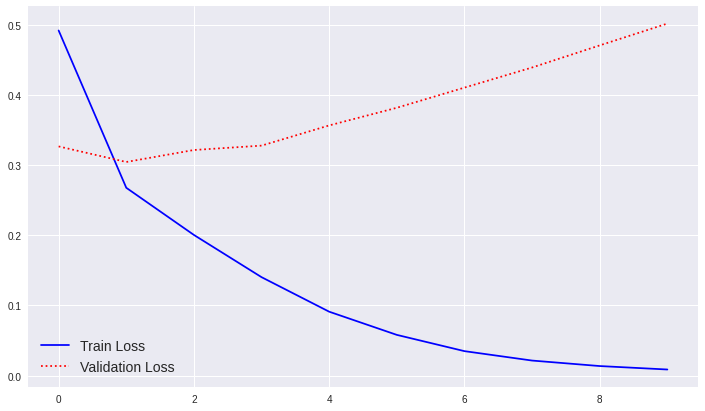

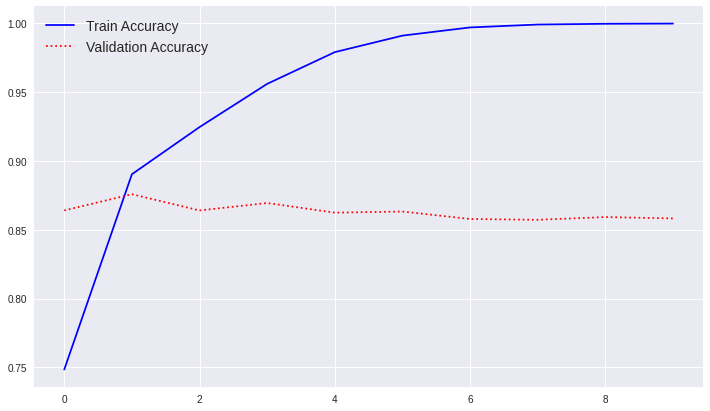

In [ ]:
hist_dict = history.history
hist_dict.keys() # dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

plt.figure(figsize = (12, 7))
plt.plot(hist_dict['loss'], 'b-', label = 'Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label = "Validation Loss")
plt.legend(fontsize = 14)
plt.show()

plt.figure(figsize = (12, 7))
plt.plot(hist_dict['acc'], 'b-', label = 'Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label = "Validation Accuracy")
plt.legend(fontsize = 14)
plt.show()